In [1]:
# This notebook demonstrates how petlink32 can be used to split data in time

In [2]:
import petlink32
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# get paths
phantom_data = r"C:/Users/petct/Desktop/Hugo/data/kex/phantom_data"
phantom_path = phantom_data + "/Cylinder/gate01"
phantom_path = phantom_data + "/kanyl/gate01" 
filenames = []
with os.scandir(phantom_path) as it:
    for entry in it:
        if entry.is_file():
            print("file name {} =".format(len(filenames)), entry.name)
            filenames.append(entry.name)

file name 0 = KanylPET-LM-01-sino-0.s
file name 1 = KanylPET-LM-01-sino-0.s.hdr
file name 2 = KanylPET-LM-01-sino.mhdr
file name 3 = KanylPET-LM-01.hdr
file name 4 = KanylPET-LM-01.l


In [4]:
listmode_path = "/".join([phantom_path, filenames[4]])
%time with open(listmode_path, 'rb') as readfile:  listmode_packets = np.fromfile(readfile, dtype = np.uint32)
%time is_elapsed_time_markers = petlink32.ELAPSED_TIME_MARKER.compare(listmode_packets) # interpret content 

Wall time: 72.8 ms
Wall time: 228 ms


number of packets =  37394799


Text(0, 0.5, 'is elapsed time marker')

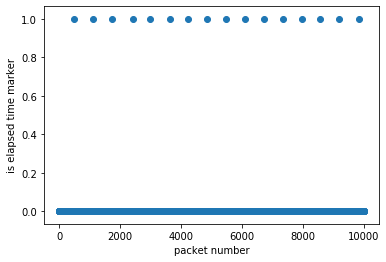

In [5]:
N = len(listmode_packets)
print("number of packets = ", N)
n = 10*1000
packet_number = np.arange(n)
plt.scatter(packet_number, is_elapsed_time_markers[:n].astype(int))
plt.xlabel('packet number')
plt.ylabel('is elapsed time marker')

In [16]:
%time time_passed_ms = np.cumsum(is_elapsed_time_markers) # how many ms have passed, per event
%time time_markers = listmode_packets[is_elapsed_time_markers]
%time time_at_markers = petlink32.TIME_MS.evaluate(time_markers)

Wall time: 227 ms
Wall time: 21.9 ms
Wall time: 0 ns


timerange (start, stop) = (0, 60013) [ms]
timerange (start, stop) = (0, 60) [s]


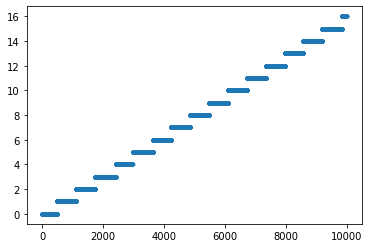

In [25]:
plt.scatter(packet_number, time_passed_ms[:n], marker='.')
a = time_at_markers[0]
b = time_at_markers[-1]
print("timerange (start, stop) = {} [ms]".format((a,b)))
print("timerange (start, stop) = {} [s]".format((a,b//(1000))))

In [26]:
%time split_indices = np.nonzero(is_elapsed_time_markers)[0] 
%time listmode_timeslices = np.split(listmode_packets, split_indices)

Wall time: 19.9 ms
Wall time: 98.7 ms


In [27]:
for timeslice in listmode_timeslices[:10]:
    print(len(timeslice))

483
623
627
682
554
670
594
631
618
619
